In [0]:
# Load the dataset from Databricks table
df = spark.table("default.filtered_motor_vehicle_collisions_2020_onwards_3_csv")

# Display the first few rows of the dataset
df.show(10)


+---------+------------+----------+-------------------+--------------------+------------------+--------------------+--------------+----------------+-----------------+----------+---------------------+---------------------------+--------------------+--------------------+--------------------+----------------------+---------------------+---------------------+---------------------+
|UNIQUE_ID|COLLISION_ID|CRASH_DATE|         CRASH_TIME|          VEHICLE_ID|STATE_REGISTRATION|        VEHICLE_TYPE|  VEHICLE_MAKE|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|DRIVER_SEX|DRIVER_LICENSE_STATUS|DRIVER_LICENSE_JURISDICTION|           PRE_CRASH|     POINT_OF_IMPACT|      VEHICLE_DAMAGE|PUBLIC_PROPERTY_DAMAGE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|TRAVEL_DIRECTION_CODE|
+---------+------------+----------+-------------------+--------------------+------------------+--------------------+--------------+----------------+-----------------+----------+---------------------+---------------------------+-------------

In [0]:
# Print the schema of the dataset
df.printSchema()

# Display summary statistics
df.describe().show()


root
 |-- UNIQUE_ID: integer (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)
 |-- CRASH_DATE: date (nullable = true)
 |-- CRASH_TIME: timestamp (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: double (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)
 |-- TRAVEL_DIRECTION_CODE: integer (nullable = true)

+-------+--------------------+-------------

In [0]:
# Count null values in each column
from pyspark.sql.functions import col, sum, when

# Generate a DataFrame showing the count of null values for each column
null_counts = df.select([(sum(when(col(c).isNull(), 1).otherwise(0))).alias(c) for c in df.columns])

# Show the result
null_counts.show()


+---------+------------+----------+----------+----------+------------------+------------+------------+----------------+-----------------+----------+---------------------+---------------------------+---------+---------------+--------------+----------------------+---------------------+---------------------+---------------------+
|UNIQUE_ID|COLLISION_ID|CRASH_DATE|CRASH_TIME|VEHICLE_ID|STATE_REGISTRATION|VEHICLE_TYPE|VEHICLE_MAKE|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|DRIVER_SEX|DRIVER_LICENSE_STATUS|DRIVER_LICENSE_JURISDICTION|PRE_CRASH|POINT_OF_IMPACT|VEHICLE_DAMAGE|PUBLIC_PROPERTY_DAMAGE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|TRAVEL_DIRECTION_CODE|
+---------+------------+----------+----------+----------+------------------+------------+------------+----------------+-----------------+----------+---------------------+---------------------------+---------+---------------+--------------+----------------------+---------------------+---------------------+---------------------+
|        0|  

In [0]:
# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Check the first few rows in Pandas DataFrame
pdf.head()


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,TRAVEL_DIRECTION_CODE
0,19693299,4322349,2020-06-22,2024-11-18 18:10:00,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,East,1.0,M,Licensed,NY,Going Straight Ahead,Right Side Doors,Right Side Doors,N,Other Vehicular,Other Vehicular,3
1,19693330,4322338,2020-06-22,2024-11-18 10:19:00,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,North,1.0,M,Licensed,NY,Parked,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,1
2,19693538,4322263,2020-06-22,2024-11-18 11:44:00,a476a608-c32b-435e-879f-1f1fb0727410,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,East,1.0,M,Licensed,NY,Making Left Turn,Right Side Doors,Right Side Doors,N,Failure to Yield Right-of-Way,Unspecified,3
3,19693856,4322497,2020-06-22,2024-11-18 01:30:00,669ca3be-cf2a-4011-9b16-9ccc9498b409,NY,Taxi,TOYT -CAR/SUV,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Quarter Panel,Left Front Quarter Panel,N,Unspecified,Unspecified,1
4,19693317,4322245,2020-06-22,2024-11-18 10:00:00,b2a80c17-b76d-4e85-9a4e-b607f46a253c,NY,Dump,BESON,West,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,4


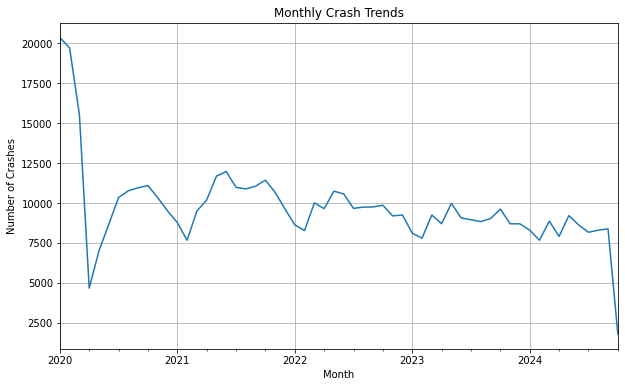

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert CRASH_DATE to datetime
pdf['CRASH_DATE'] = pd.to_datetime(pdf['CRASH_DATE'])

# Group data by year and month
monthly_trends = pdf.groupby(pdf['CRASH_DATE'].dt.to_period('M')).size()

# Plot monthly trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', title='Monthly Crash Trends')
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.grid()
plt.show()


In [0]:
from pyspark.sql.functions import year, month, count

# Extract year and month from the crash date
df_with_date = df.withColumn("CRASH_YEAR", year("CRASH_DATE")).withColumn("CRASH_MONTH", month("CRASH_DATE"))

# Aggregate crashes by year
yearly_trends = df_with_date.groupBy("CRASH_YEAR").agg(count("*").alias("TOTAL_CRASHES"))
yearly_trends.show()

# Aggregate crashes by month
monthly_trends = df_with_date.groupBy("CRASH_MONTH").agg(count("*").alias("TOTAL_CRASHES"))
monthly_trends.show()


+----------+-------------+
|CRASH_YEAR|TOTAL_CRASHES|
+----------+-------------+
|      2023|       106711|
|      2022|       115323|
|      2020|       138923|
|      2024|        77221|
|      2021|       124388|
+----------+-------------+

+-----------+-------------+
|CRASH_MONTH|TOTAL_CRASHES|
+-----------+-------------+
|         12|        37071|
|          1|        54173|
|          6|        48884|
|          3|        53140|
|          5|        48608|
|          9|        49165|
|          4|        41110|
|          8|        48523|
|          7|        48100|
|         10|        43791|
|         11|        38889|
|          2|        51112|
+-----------+-------------+



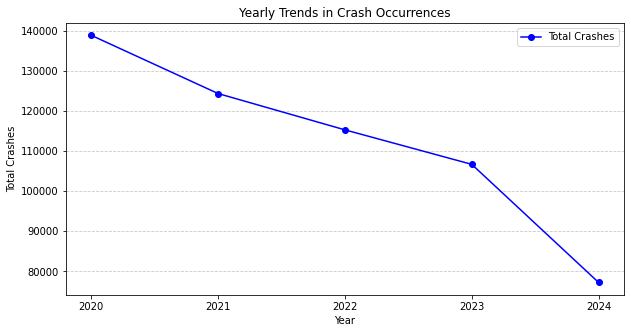

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import year, month, count

# Extract year and month from the crash date
df_with_date = df.withColumn("CRASH_YEAR", year("CRASH_DATE")).withColumn("CRASH_MONTH", month("CRASH_DATE"))

# Aggregate crashes by year
yearly_trends = df_with_date.groupBy("CRASH_YEAR").agg(count("*").alias("TOTAL_CRASHES")).orderBy("CRASH_YEAR")
yearly_trends_data = yearly_trends.collect()

# Extract data for plotting
years = [row['CRASH_YEAR'] for row in yearly_trends_data]
yearly_crashes = [row['TOTAL_CRASHES'] for row in yearly_trends_data]

# Plot yearly trends as a line graph
plt.figure(figsize=(10, 5))
plt.plot(years, yearly_crashes, marker='o', linestyle='-', color='blue', label="Total Crashes")
plt.xlabel("Year")
plt.ylabel("Total Crashes")
plt.title("Yearly Trends in Crash Occurrences")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


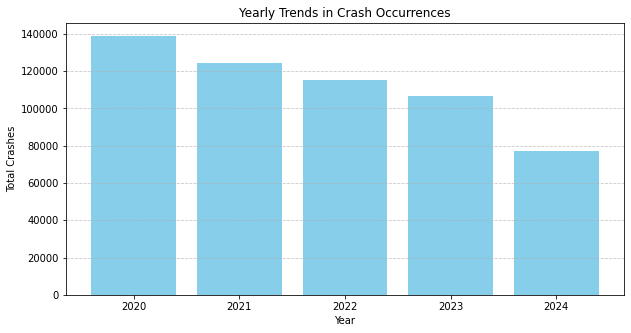

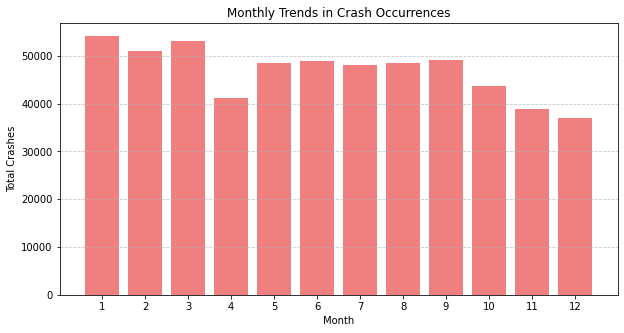

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import year, month, count

# Extract year and month from the crash date
df_with_date = df.withColumn("CRASH_YEAR", year("CRASH_DATE")).withColumn("CRASH_MONTH", month("CRASH_DATE"))

# Aggregate crashes by year
yearly_trends = df_with_date.groupBy("CRASH_YEAR").agg(count("*").alias("TOTAL_CRASHES")).orderBy("CRASH_YEAR")
yearly_trends_data = yearly_trends.collect()

# Aggregate crashes by month
monthly_trends = df_with_date.groupBy("CRASH_MONTH").agg(count("*").alias("TOTAL_CRASHES")).orderBy("CRASH_MONTH")
monthly_trends_data = monthly_trends.collect()

# Extract data for plotting
years = [row['CRASH_YEAR'] for row in yearly_trends_data]
yearly_crashes = [row['TOTAL_CRASHES'] for row in yearly_trends_data]

months = [row['CRASH_MONTH'] for row in monthly_trends_data]
monthly_crashes = [row['TOTAL_CRASHES'] for row in monthly_trends_data]

# Plot yearly trends
plt.figure(figsize=(10, 5))
plt.bar(years, yearly_crashes, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Crashes")
plt.title("Yearly Trends in Crash Occurrences")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot monthly trends
plt.figure(figsize=(10, 5))
plt.bar(months, monthly_crashes, color='lightcoral')
plt.xlabel("Month")
plt.ylabel("Total Crashes")
plt.title("Monthly Trends in Crash Occurrences")
plt.xticks(months)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [0]:
from pyspark.sql.functions import hour, when

# Extract hour from crash time
df_with_hour = df.withColumn("CRASH_HOUR", hour("CRASH_TIME"))

# Categorize into morning, afternoon, evening, night
df_with_time_category = df_with_hour.withColumn(
    "TIME_OF_DAY",
    when((df_with_hour.CRASH_HOUR >= 6) & (df_with_hour.CRASH_HOUR < 12), "Morning")
    .when((df_with_hour.CRASH_HOUR >= 12) & (df_with_hour.CRASH_HOUR < 18), "Afternoon")
    .when((df_with_hour.CRASH_HOUR >= 18) & (df_with_hour.CRASH_HOUR < 24), "Evening")
    .otherwise("Night")
)

# Aggregate crashes by time of day
time_of_day_trends = df_with_time_category.groupBy("TIME_OF_DAY").agg(count("*").alias("TOTAL_CRASHES"))
time_of_day_trends.show()


+-----------+-------------+
|TIME_OF_DAY|TOTAL_CRASHES|
+-----------+-------------+
|    Evening|       144763|
|    Morning|       138949|
|  Afternoon|       204982|
|      Night|        73872|
+-----------+-------------+



In [0]:
# Aggregate crashes by driver sex
driver_sex_trends = df.groupBy("DRIVER_SEX").agg(count("*").alias("TOTAL_CRASHES"))
driver_sex_trends.show()


+----------+-------------+
|DRIVER_SEX|TOTAL_CRASHES|
+----------+-------------+
|         F|       142994|
|         M|       418302|
|         U|         1270|
+----------+-------------+



<Figure size 576x360 with 0 Axes>

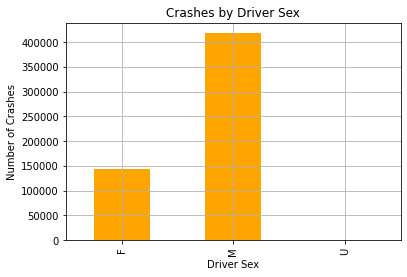

In [0]:
# Group by DRIVER_SEX and calculate crash counts and average vehicle occupants
driver_stats = pdf.groupby('DRIVER_SEX')['VEHICLE_OCCUPANTS'].agg(['count', 'mean']).reset_index()

# Plot driver demographics
plt.figure(figsize=(8, 5))
driver_stats.plot(kind='bar', x='DRIVER_SEX', y='count', legend=False, color='orange', title='Crashes by Driver Sex')
plt.xlabel("Driver Sex")
plt.ylabel("Number of Crashes")
plt.grid()
plt.show()


In [0]:
# Aggregate crashes by number of vehicle occupants
occupants_trends = df.groupBy("VEHICLE_OCCUPANTS").agg(count("*").alias("TOTAL_CRASHES"))
occupants_trends.orderBy("VEHICLE_OCCUPANTS").show()


+-----------------+-------------+
|VEHICLE_OCCUPANTS|TOTAL_CRASHES|
+-----------------+-------------+
|              1.0|       411419|
|              2.0|       102653|
|              3.0|        29482|
|              4.0|        11199|
|              5.0|         4097|
|              6.0|         1359|
|              7.0|          615|
|              8.0|          368|
|              9.0|          260|
|             10.0|          208|
|             11.0|          162|
|             12.0|          110|
|             13.0|           94|
|             14.0|           70|
|             15.0|           78|
|             16.0|           49|
|             17.0|           34|
|             18.0|           23|
|             19.0|           15|
|             20.0|           32|
+-----------------+-------------+
only showing top 20 rows



In [0]:
# Aggregate crashes by vehicle type
vehicle_type_trends = df.groupBy("VEHICLE_TYPE").agg(count("*").alias("TOTAL_CRASHES"))
vehicle_type_trends.orderBy("TOTAL_CRASHES", ascending=False).show()


+--------------------+-------------+
|        VEHICLE_TYPE|TOTAL_CRASHES|
+--------------------+-------------+
|               Sedan|       259738|
|Station Wagon/Spo...|       201161|
|                Taxi|        17238|
|       Pick-up Truck|        14153|
|           Box Truck|        13776|
|                 Bus|        12992|
|Tractor Truck Diesel|         6234|
|          Motorcycle|         5241|
|                 Van|         4010|
|           Ambulance|         3758|
|                Dump|         2560|
|               Moped|         1828|
|   Garbage or Refuse|         1478|
|            Flat Bed|         1456|
|                  PK|         1427|
|         Convertible|         1334|
|                Bike|         1062|
|           Carry All|         1024|
|Tractor Truck Gas...|          885|
| Tow Truck / Wrecker|          796|
+--------------------+-------------+
only showing top 20 rows



In [0]:
%sql
CREATE TABLE motor_vehicle_collisions
USING csv
OPTIONS (
    path '/FileStore/tables/filtered_motor_vehicle_collisions_2020_onwards.csv',
    header 'true',
    inferSchema 'true'
);


---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-3308136697089614>:7
      5     display(df)
      6     return df
----> 7   _sqldf = ____databricks_percent_sql()
      8 finally:
      9   del ____databricks_percent_sql

File <command-3308136697089614>:4, in ____databricks_percent_sql()
      2 def ____databricks_percent_sql():
      3   import base64
----> 4   df = spark.sql(base64.standard_b64decode("Q1JFQVRFIFRBQkxFIG1vdG9yX3ZlaGljbGVfY29sbGlzaW9ucwpVU0lORyBjc3YKT1BUSU9OUyAoCiAgICBwYXRoICcvRmlsZVN0b3JlL3RhYmxlcy9maWx0ZXJlZF9tb3Rvcl92ZWhpY2xlX2NvbGxpc2lvbnNfMjAyMF9vbndhcmRzLmNzdicsCiAgICBoZWFkZXIgJ3RydWUnLAogICAgaW5mZXJTY2hlbWEgJ3RydWUnCik=").decode())
      5   display(df)
      6   return df

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48 

In [0]:
%sql
SELECT * FROM motor_vehicle_collisions LIMIT 10;


UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,TRAVEL_DIRECTION_CODE
19693299,4322349,2020-06-22,2024-11-18T18:10:00.000+0000,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,East,1.0,M,Licensed,NY,Going Straight Ahead,Right Side Doors,Right Side Doors,N,Other Vehicular,Other Vehicular,3
19693330,4322338,2020-06-22,2024-11-18T10:19:00.000+0000,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,North,1.0,M,Licensed,NY,Parked,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,1
19693538,4322263,2020-06-22,2024-11-18T11:44:00.000+0000,a476a608-c32b-435e-879f-1f1fb0727410,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,East,1.0,M,Licensed,NY,Making Left Turn,Right Side Doors,Right Side Doors,N,Failure to Yield Right-of-Way,Unspecified,3
19693856,4322497,2020-06-22,2024-11-18T01:30:00.000+0000,669ca3be-cf2a-4011-9b16-9ccc9498b409,NY,Taxi,TOYT -CAR/SUV,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Quarter Panel,Left Front Quarter Panel,N,Unspecified,Unspecified,1
19693317,4322245,2020-06-22,2024-11-18T10:00:00.000+0000,b2a80c17-b76d-4e85-9a4e-b607f46a253c,NY,Dump,BESON,West,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,4
20668499,4732902,2024-05-21,2024-11-18T08:00:00.000+0000,efad751c-62c9-4182-9269-8996baeec300,PA,Sedan,BMW -CAR/SUV,West,1.0,M,Permit,NJ,Making Left Turn,Right Rear Quarter Panel,Right Rear Quarter Panel,N,Unspecified,Unspecified,4
19693666,4322423,2020-06-22,2024-11-18T14:30:00.000+0000,c3fa4d41-805f-446b-9240-4f0b60f3483d,NJ,Station Wagon/Sport Utility Vehicle,CADI -CAR/SUV,North,4.0,M,Licensed,NJ,Going Straight Ahead,Center Back End,Center Back End,N,Other Vehicular,Other Vehicular,1
20666624,4732250,2024-06-12,2024-11-18T09:39:00.000+0000,1a811da2-95ab-4ec3-b633-5abb3eb5e114,NY,Sedan,BMW -CAR/SUV,South,1.0,M,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Unspecified,2
19694499,4322780,2020-06-06,2024-11-18T12:00:00.000+0000,227e8966-faff-4903-8383-0c1feb4fe212,NC,Station Wagon/Sport Utility Vehicle,GMC -CAR/SUV,West,1.0,M,Licensed,NC,Going Straight Ahead,Center Front End,Center Front End,N,Following Too Closely,Driver Inattention/Distraction,4
20666833,4732171,2024-06-12,2024-11-18T08:52:00.000+0000,6e61bd27-29b7-4972-8ecb-8cccc4050317,NY,Station Wagon/Sport Utility Vehicle,HYUN -CAR/SUV,North,3.0,F,Licensed,NY,Going Straight Ahead,Right Front Bumper,Right Front Bumper,N,Unspecified,Unspecified,1


In [0]:
%sql
SELECT 
    VEHICLE_OCCUPANTS, 
    COUNT(*) AS TOTAL_CRASHES
FROM motor_vehicle_collisions
GROUP BY VEHICLE_OCCUPANTS
ORDER BY VEHICLE_OCCUPANTS;


VEHICLE_OCCUPANTS,TOTAL_CRASHES
1.0,411419
2.0,102653
3.0,29482
4.0,11199
5.0,4097
6.0,1359
7.0,615
8.0,368
9.0,260
10.0,208


In [0]:
%sql
SELECT 
    VEHICLE_TYPE, 
    COUNT(*) AS TOTAL_CRASHES
FROM motor_vehicle_collisions
GROUP BY VEHICLE_TYPE
ORDER BY TOTAL_CRASHES DESC;


VEHICLE_TYPE,TOTAL_CRASHES
Sedan,259738
Station Wagon/Sport Utility Vehicle,201161
Taxi,17238
Pick-up Truck,14153
Box Truck,13776
Bus,12992
Tractor Truck Diesel,6234
Motorcycle,5241
Van,4010
Ambulance,3758


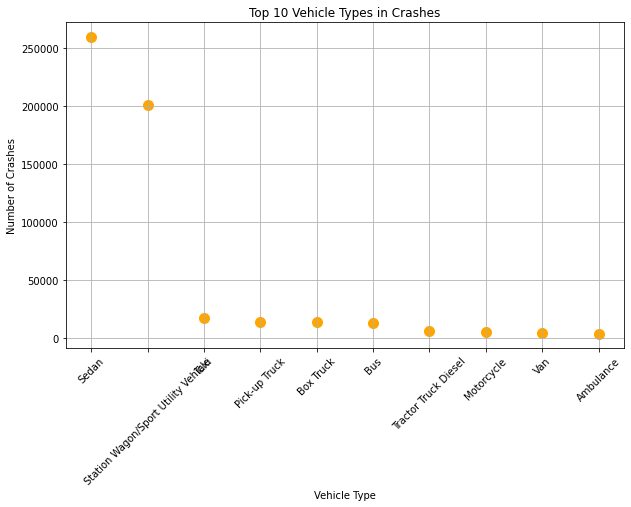

In [0]:
import matplotlib.pyplot as plt

# Aggregate crashes by Vehicle Type using PySpark
vehicle_type_counts = (
    df.groupBy("VEHICLE_TYPE")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
    .toPandas()
)

# Prepare data for scatter plot
vehicle_types = vehicle_type_counts["VEHICLE_TYPE"]
crash_counts = vehicle_type_counts["count"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vehicle_types, crash_counts, color='orange', s=100)  # `s` sets marker size
plt.title('Top 10 Vehicle Types in Crashes')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


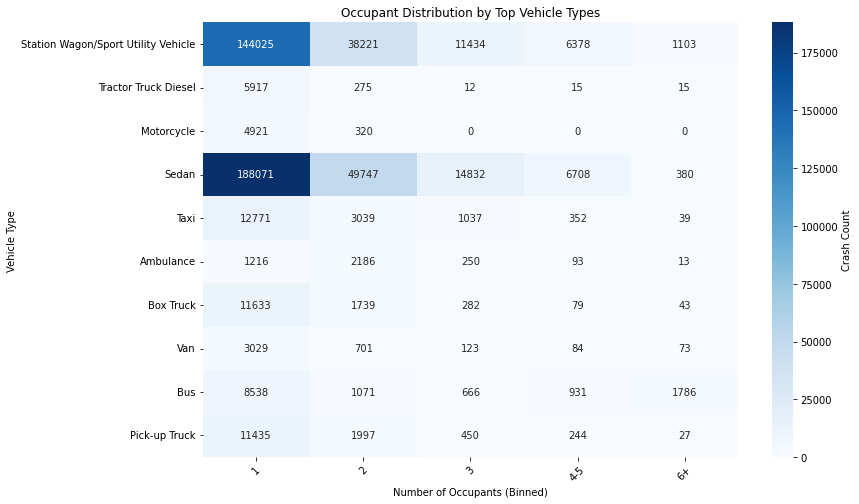

In [0]:
# Step 1: Filter for Top 10 Vehicle Types
top_vehicle_types = (
    df_with_bins.groupBy("VEHICLE_TYPE")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
    .select("VEHICLE_TYPE")
    .rdd.flatMap(lambda x: x)
    .collect()
)

# Filter the data for these top vehicle types
filtered_df = df_with_bins.filter(col("VEHICLE_TYPE").isin(top_vehicle_types))

# Step 2: Aggregate and Pivot Data for Heatmap
heatmap_data_spark = (
    filtered_df.groupBy("VEHICLE_TYPE", "Occupant_Bin")
    .count()
    .groupBy("VEHICLE_TYPE")
    .pivot("Occupant_Bin")
    .sum("count")
    .fillna(0)
)

# Convert to Pandas DataFrame
heatmap_data = heatmap_data_spark.toPandas()

# Set VEHICLE_TYPE as the index for the heatmap
heatmap_data.set_index("VEHICLE_TYPE", inplace=True)

# Step 3: Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar_kws={'label': 'Crash Count'}
)
plt.title('Occupant Distribution by Top Vehicle Types')
plt.xlabel('Number of Occupants (Binned)')
plt.ylabel('Vehicle Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [0]:
from pyspark.sql.functions import year, month, count

# Aggregate crashes by year and month
df_with_date = df.withColumn("CRASH_YEAR", year("CRASH_DATE")).withColumn("CRASH_MONTH", month("CRASH_DATE"))
monthly_crashes = (
    df_with_date.groupBy("CRASH_YEAR", "CRASH_MONTH")
    .agg(count("*").alias("TOTAL_CRASHES"))
    .orderBy("CRASH_YEAR", "CRASH_MONTH")
)

# Convert to Pandas for time-series modeling
monthly_crashes_pdf = monthly_crashes.toPandas()

# Create a proper datetime column for time indexing
monthly_crashes_pdf['CRASH_DATE'] = pd.to_datetime(
    monthly_crashes_pdf['CRASH_YEAR'].astype(str) + '-' + monthly_crashes_pdf['CRASH_MONTH'].astype(str)
)
monthly_crashes_pdf = monthly_crashes_pdf.set_index('CRASH_DATE')
monthly_crashes_pdf = monthly_crashes_pdf[['TOTAL_CRASHES']]  # Keep only relevant columns


/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          TOTAL_CRASHES   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -512.371
Date:                Mon, 18 Nov 2024   AIC                           1030.741
Time:                        03:38:16   BIC                           1036.870
Sample:                    01-01-2020   HQIC                          1033.123
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9993      0.025    -40.493      0.000      -1.048      -0.951
ma.L1          0.9947      0.102      9.745      0.000       0.795       1.195
sigma2      3.724e+06   2.22e-08   1.68e+14      0.0

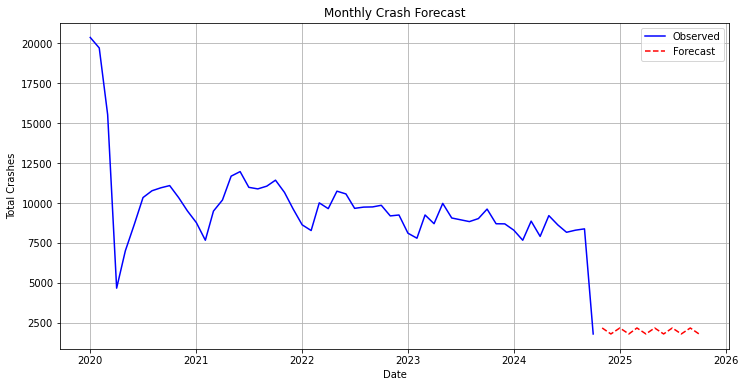

In [0]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Configure ARIMA model (Adjust order for best performance)
arima_model = ARIMA(monthly_crashes_pdf['TOTAL_CRASHES'], order=(1, 1, 1))  # p, d, q
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Forecast for the next 12 months
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

# Plot observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_crashes_pdf['TOTAL_CRASHES'], label='Observed', color='blue')
plt.plot(forecast.index, forecast.values, label='Forecast', color='red', linestyle='--')
plt.title('Monthly Crash Forecast')
plt.xlabel('Date')
plt.ylabel('Total Crashes')
plt.legend()
plt.grid(True)
plt.show()


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data for validation (last 12 months for testing)
train = monthly_crashes_pdf[:-12]
test = monthly_crashes_pdf[-12:]

# Train ARIMA model on train data
arima_model_train = ARIMA(train['TOTAL_CRASHES'], order=(1, 1, 1))
arima_result_train = arima_model_train.fit()

# Predict on the test set
predicted = arima_result_train.forecast(steps=len(test))

# Calculate performance metrics
mae = mean_absolute_error(test['TOTAL_CRASHES'], predicted)
rmse = np.sqrt(mean_squared_error(test['TOTAL_CRASHES'], predicted))
mape = np.mean(np.abs((test['TOTAL_CRASHES'] - predicted) / test['TOTAL_CRASHES'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 1733.1550199009373
RMSE: 2555.4719208682345
MAPE: 49.272291947739184%


/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [0]:
from pyspark.sql.functions import hour, when

# Extract hour from CRASH_TIME and categorize into time of day
df = df.withColumn("CRASH_HOUR", hour("CRASH_TIME"))
df = df.withColumn(
    "TIME_OF_DAY",
    when((df.CRASH_HOUR >= 6) & (df.CRASH_HOUR < 12), "Morning")
    .when((df.CRASH_HOUR >= 12) & (df.CRASH_HOUR < 18), "Afternoon")
    .when((df.CRASH_HOUR >= 18) & (df.CRASH_HOUR < 24), "Evening")
    .otherwise("Night")
)
